# Linear Regression Modeling

In [17]:
# Import packages

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [4]:
# Call in cleaned airbnb data file

df=pd.read_csv('cleaned_airbnb_data.csv', index_col=0)

In [5]:
df.head()

,name,price_per_night,rating_overall,rating_cleanliness,rating_accuracy,rating_communication,rating_location,rating_check_in,rating_value,num_listing_reviews,...,num_bedrooms,num_beds,num_baths,superhost,borough,property_type,wifi,air_conditioning,heating,kitchen
0,Gramercy park Apartment (2beds),107,4.66,4.6,4.8,4.8,5.0,4.8,4.6,32,...,0,2,1.0,0,manhattan,apartment,1,1,1,1
1,Amazing Views in The Heart of Time Square,305,4.91,4.9,4.8,4.8,4.9,4.6,4.8,117,...,1,1,1.0,0,manhattan,apartment,1,1,1,1
2,FREEMAN'S HOUSE Charming Studio W/ Terrace 1402,159,4.67,4.7,3.3,4.3,3.7,5.0,3.3,3,...,1,1,1.0,0,manhattan,apartment,1,1,1,0
3,West Side Charm - Central Park! Uh,179,4.42,4.2,4.5,4.7,4.9,4.6,4.5,306,...,1,0,1.0,0,manhattan,apartment,1,1,1,1
4,West Village Style and Charm -Thoroughly Sanit...,130,4.97,5.0,5.0,5.0,5.0,4.9,4.9,220,...,1,1,1.5,1,manhattan,private room,1,1,1,1


In [7]:
df.shape

(948, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 947
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    948 non-null    object 
 1   price_per_night         948 non-null    int64  
 2   rating_overall          948 non-null    float64
 3   rating_cleanliness      948 non-null    float64
 4   rating_accuracy         948 non-null    float64
 5   rating_communication    948 non-null    float64
 6   rating_location         948 non-null    float64
 7   rating_check_in         948 non-null    float64
 8   rating_value            948 non-null    float64
 9   num_listing_reviews     948 non-null    int64  
 10  num_host_ratings        948 non-null    int64  
 11  host_response_rate      948 non-null    int64  
 12  host_joined_months_ago  948 non-null    int64  
 13  num_guests              948 non-null    int64  
 14  num_bedrooms            948 non-null    in

In [9]:
df.describe()

,price_per_night,rating_overall,rating_cleanliness,rating_accuracy,rating_communication,rating_location,rating_check_in,rating_value,num_listing_reviews,num_host_ratings,...,host_joined_months_ago,num_guests,num_bedrooms,num_beds,num_baths,superhost,wifi,air_conditioning,heating,kitchen
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,...,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,140.157173,4.759979,4.766772,4.815295,4.867405,4.786076,4.868038,4.741245,95.068565,307.607595,...,54.366034,2.950422,1.080169,1.589662,1.074895,0.467300,0.994726,0.957806,0.981013,0.785865
std,78.546239,0.234972,0.244956,0.217377,0.186341,0.196850,0.175421,0.225505,112.371539,634.882708,...,32.957205,1.398698,0.618192,0.942586,0.249989,0.499193,0.072471,0.201138,0.136552,0.410437
min,38.000000,3.000000,3.200000,3.000000,3.200000,3.000000,3.300000,3.000000,3.000000,3.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85.000000,4.670000,4.700000,4.800000,4.800000,4.700000,4.800000,4.700000,19.000000,40.000000,...,27.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,120.000000,4.820000,4.800000,4.900000,4.900000,4.800000,4.900000,4.800000,55.000000,132.000000,...,51.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,171.250000,4.920000,4.900000,5.000000,5.000000,4.900000,5.000000,4.900000,130.250000,300.250000,...,79.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,649.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,757.000000,5283.000000,...,155.000000,12.000000,4.000000,10.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Scope out regression viability

## Numeric Features

In [42]:
numeric_features = ['price_per_night', 'rating_overall', 'rating_cleanliness', 'rating_accuracy', 'rating_communication', 'rating_location', 'rating_check_in', 'rating_value', 'num_listing_reviews', 'num_host_ratings', 'host_response_rate', 'host_joined_months_ago', 'num_guests', 'num_bedrooms', 'num_beds', 'num_baths']

In [43]:
sub_df = df.loc[:, numeric_features]
sub_df.head()

,price_per_night,rating_overall,rating_cleanliness,rating_accuracy,rating_communication,rating_location,rating_check_in,rating_value,num_listing_reviews,num_host_ratings,host_response_rate,host_joined_months_ago,num_guests,num_bedrooms,num_beds,num_baths
0,107,4.66,4.6,4.8,4.8,5.0,4.8,4.6,32,32,80,18,3,0,2,1.0
1,305,4.91,4.9,4.8,4.8,4.9,4.6,4.8,117,117,70,27,3,1,1,1.0
2,159,4.67,4.7,3.3,4.3,3.7,5.0,3.3,3,307,96,24,2,1,1,1.0
3,179,4.42,4.2,4.5,4.7,4.9,4.6,4.5,306,360,100,106,2,1,0,1.0
4,130,4.97,5.0,5.0,5.0,5.0,4.9,4.9,220,234,100,89,2,1,1,1.5


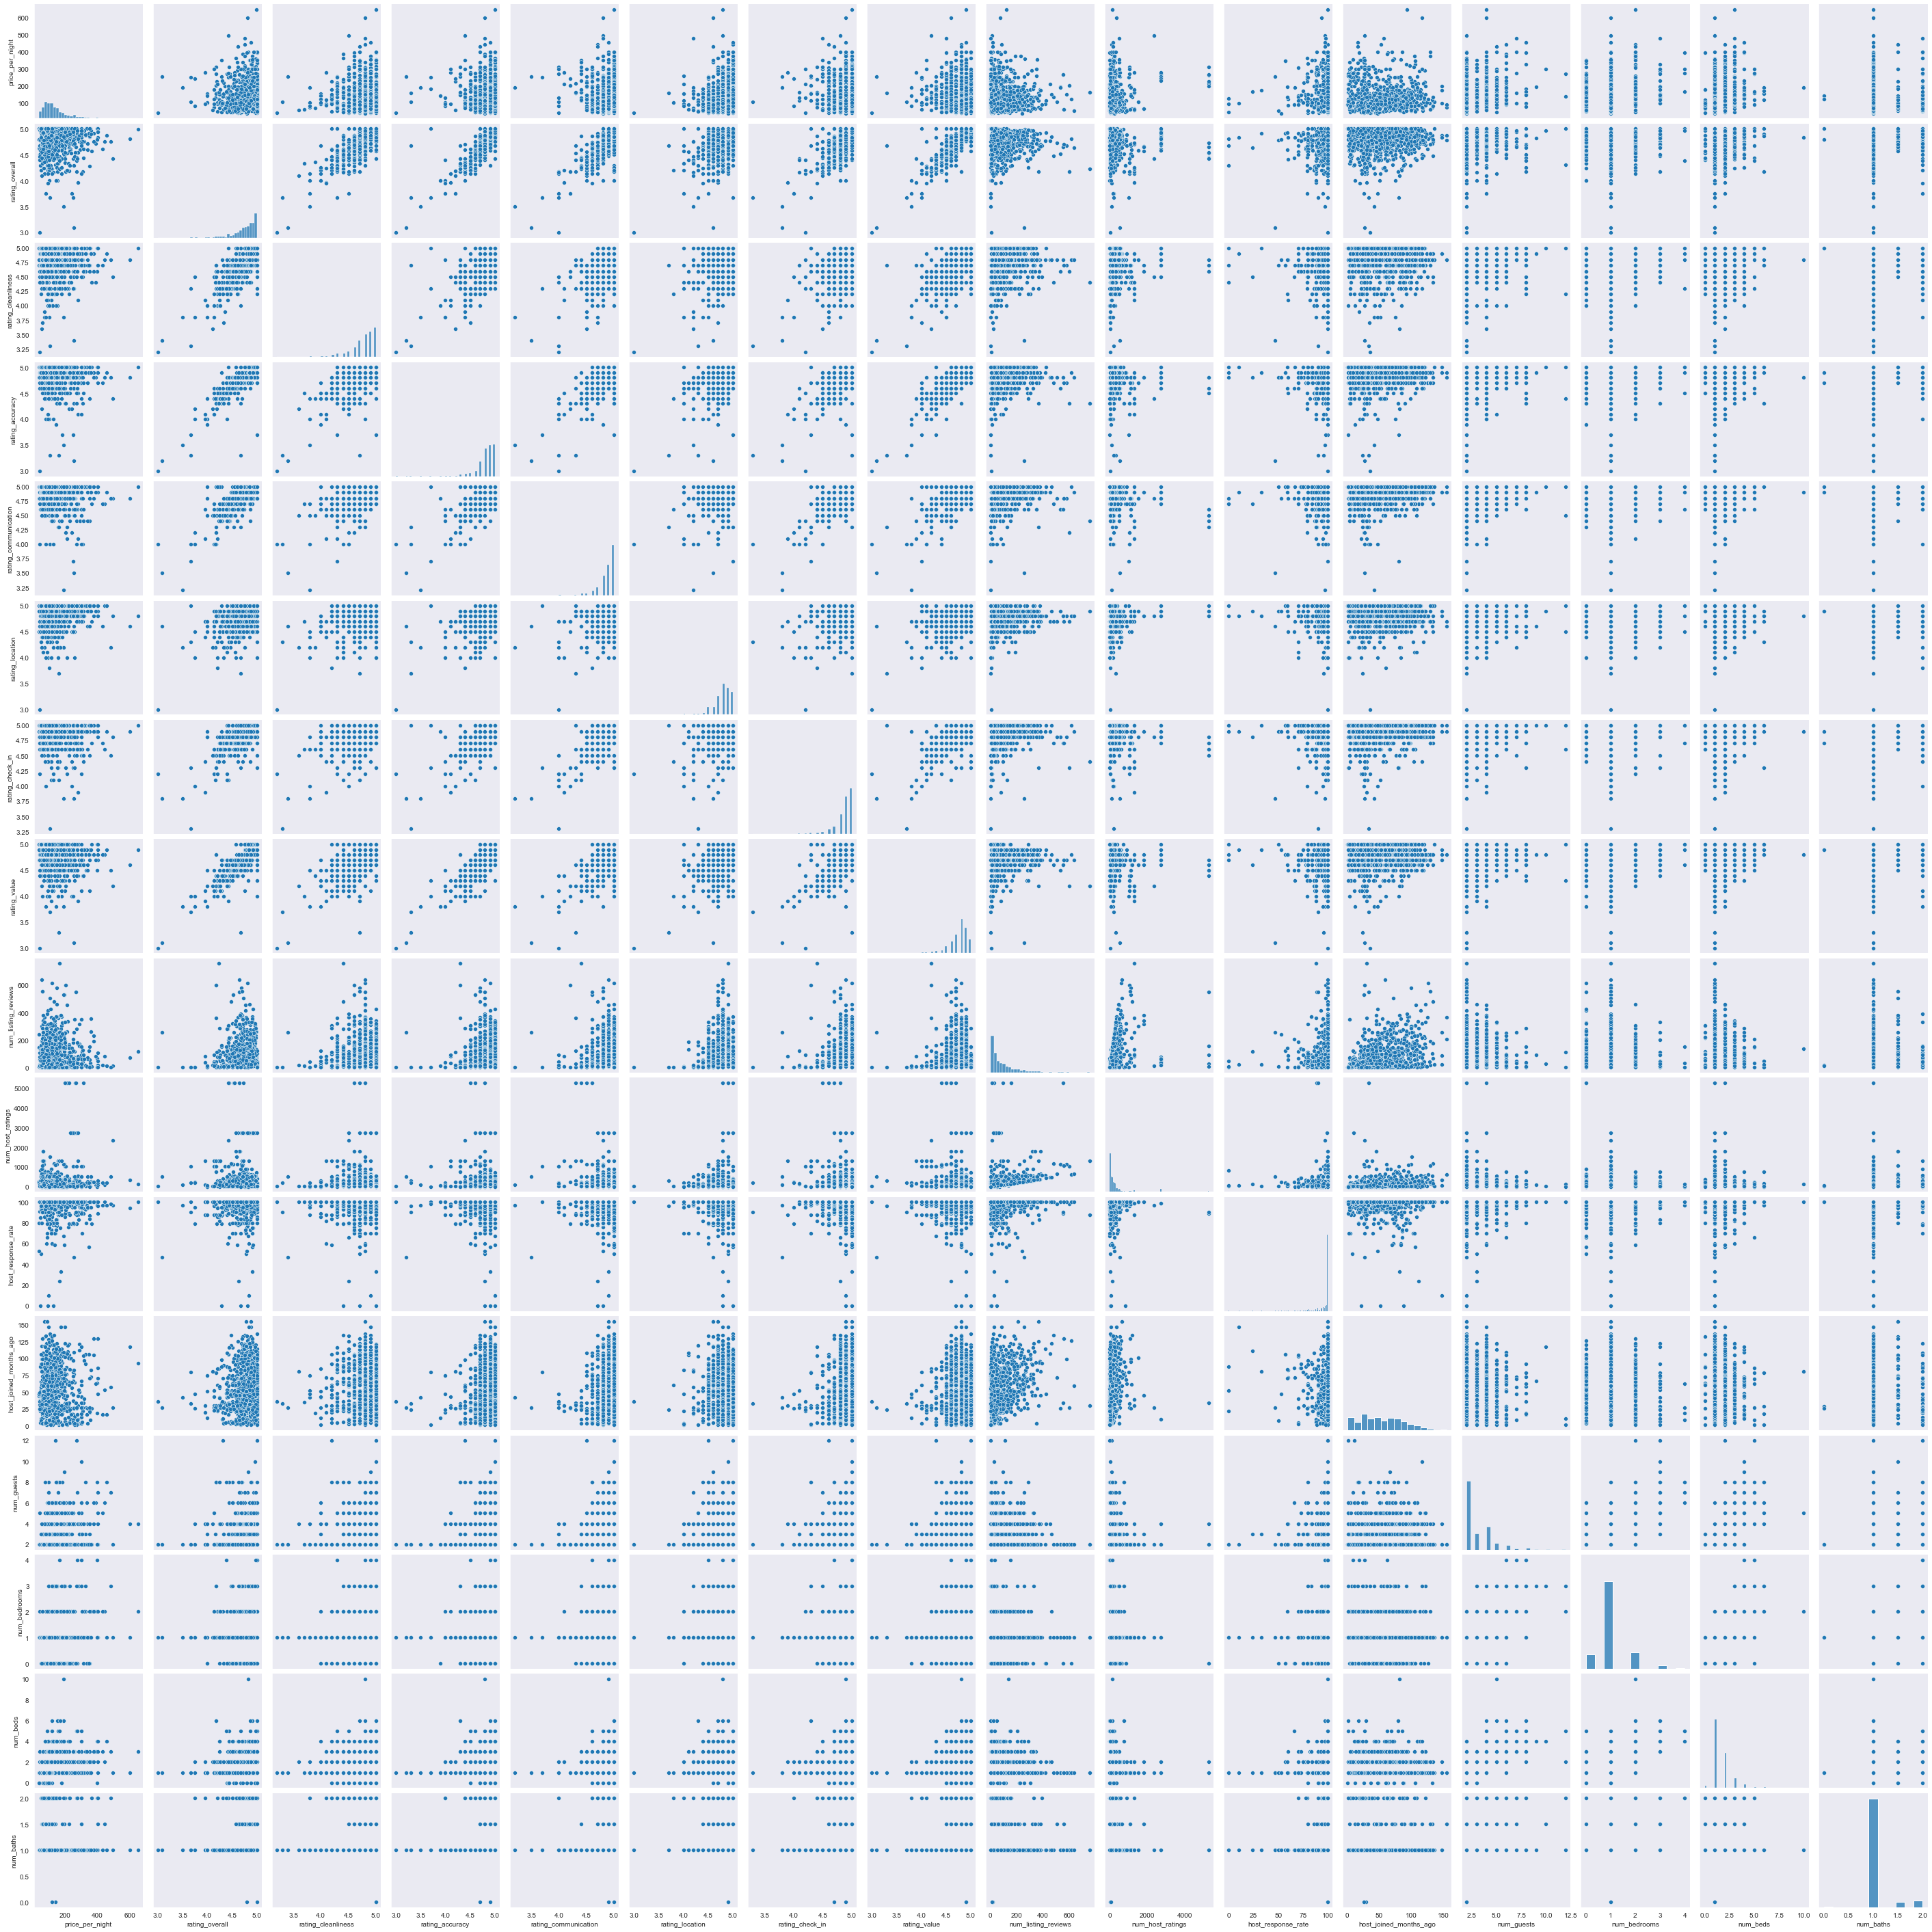

In [44]:
sns.pairplot(sub_df)

In [15]:
sub_df.corr()

,price_per_night,rating_overall,rating_cleanliness,rating_accuracy,rating_communication,rating_location,rating_check_in,rating_value,num_listing_reviews,num_host_ratings,host_response_rate,host_joined_months_ago,num_guests,num_bedrooms,num_beds,num_baths
price_per_night,1.000000,0.019526,0.044644,-0.043452,-0.092430,0.173638,-0.087378,-0.080843,0.010212,0.230795,-0.027327,-0.059606,0.294593,0.199313,0.201292,-0.005548
rating_overall,0.019526,1.000000,0.810631,0.856873,0.778216,0.503637,0.735846,0.844232,-0.126121,-0.156496,0.170126,0.099038,0.036721,0.038250,0.045874,-0.021455
rating_cleanliness,0.044644,0.810631,1.000000,0.709398,0.598091,0.390053,0.572167,0.689321,-0.071758,-0.083752,0.161209,0.015268,0.029706,0.011334,0.041958,-0.077440
rating_accuracy,-0.043452,0.856873,0.709398,1.000000,0.748515,0.487921,0.713721,0.845556,-0.061502,-0.129696,0.112781,0.147867,0.033754,0.008153,0.043548,-0.002642
rating_communication,-0.092430,0.778216,0.598091,0.748515,1.000000,0.398413,0.785392,0.713539,-0.104257,-0.226969,0.174403,0.161132,0.089814,0.051125,0.099322,-0.025746
rating_location,0.173638,0.503637,0.390053,0.487921,0.398413,1.000000,0.399313,0.502508,-0.001752,0.063407,0.005241,0.064998,-0.064640,-0.049824,-0.072939,-0.034578
rating_check_in,-0.087378,0.735846,0.572167,0.713721,0.785392,0.399313,1.000000,0.655595,-0.065666,-0.166072,0.109375,0.133515,0.052496,0.014890,0.069398,-0.006759
rating_value,-0.080843,0.844232,0.689321,0.845556,0.713539,0.502508,0.655595,1.000000,-0.102136,-0.130052,0.127030,0.120812,0.042647,0.066396,0.068777,0.003215
num_listing_reviews,0.010212,-0.126121,-0.071758,-0.061502,-0.104257,-0.001752,-0.065666,-0.102136,1.000000,0.272284,0.023339,0.289619,-0.053397,-0.093565,-0.048664,-0.010840
num_host_ratings,0.230795,-0.156496,-0.083752,-0.129696,-0.226969,0.063407,-0.166072,-0.130052,0.272284,1.000000,-0.022876,-0.105580,-0.115839,-0.144149,-0.106430,-0.019222


Text(0.5, 1.0, "Correlations between dataset's numeric features")

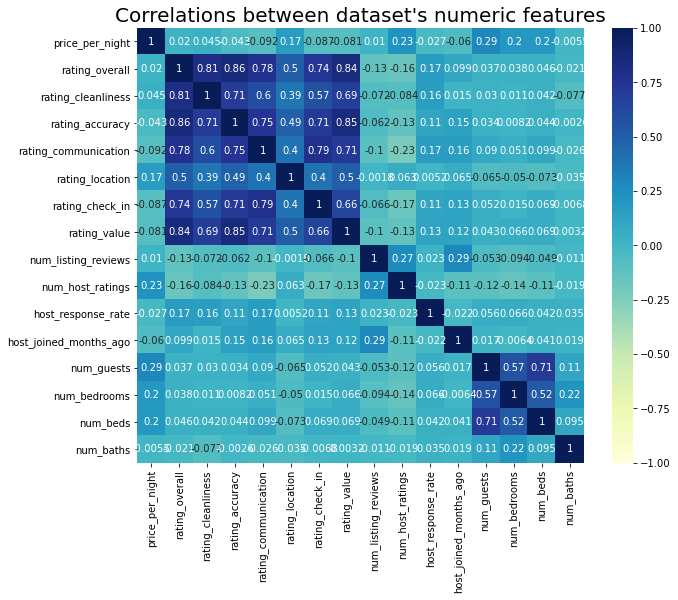

In [18]:
f, ax = plt.subplots(figsize=(10,8))
heatmap_airbnb = sns.heatmap(sub_df.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)
plt.title("Correlations between dataset's numeric features", fontsize=20)

Observations:
* Correlation among the rating features, which makes sense. Potentially have to drop some.
* Also some correlation among num_guests, num_beds, and num_bedrooms
* Looks like num_guests, num_bedrooms, num_beds have strongest correlations with price. They are all proxies for property size.
* Other strong features are number of host ratings and location rating (categorical "borough" feature should support this)

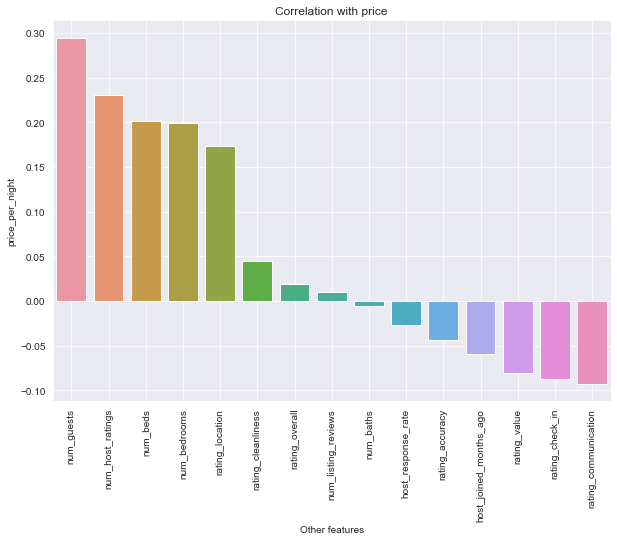

In [35]:
# Sorting the data and reset the index
df_corr = sub_df.corr().sort_values(numeric_features, ascending=False).reset_index()

df_corr = df_corr[df_corr["price_per_night"] < 1]  # Eliminate the 'price' in the x-axis

plt.figure(figsize=(10,7))
sns.barplot(x = "index", y = "price_per_night", data = df_corr);
plt.xlabel("Other features")
plt.xticks(rotation = 90)
plt.title("Correlation with price");
plt.grid(True)
sns.set_style("dark")

Notes:
- Can probably drop all features to the right of location rating. They don't have strong correlations with price.
- Some unexpected negative correlations (ratings, host response rate, how long host has been on airbnb). They don't seem intuitive.

In [227]:
updated_numeric_features = ['price_per_night', 'rating_location', 'rating_cleanliness', 'rating_overall', 'num_host_ratings', 'num_guests', 'num_bedrooms', 'num_beds']

In [228]:
sub_df = df.loc[:, updated_numeric_features]

Text(0.5, 1.0, "Correlations between dataset's selected numeric features")

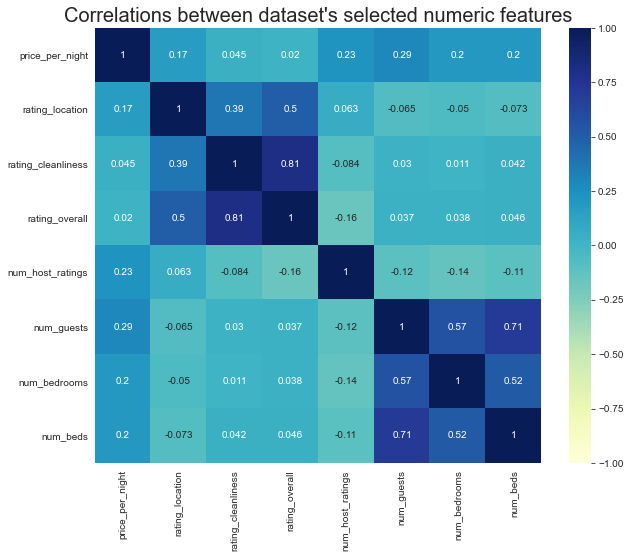

In [229]:
f, ax = plt.subplots(figsize=(10,8))
heatmap_airbnb = sns.heatmap(sub_df.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)
plt.title("Correlations between dataset's selected numeric features", fontsize=20)

- Still some multicolinearity among proxies for property size (num_guests, num_bedrooms, num_beds)
- May drop later but keep for now

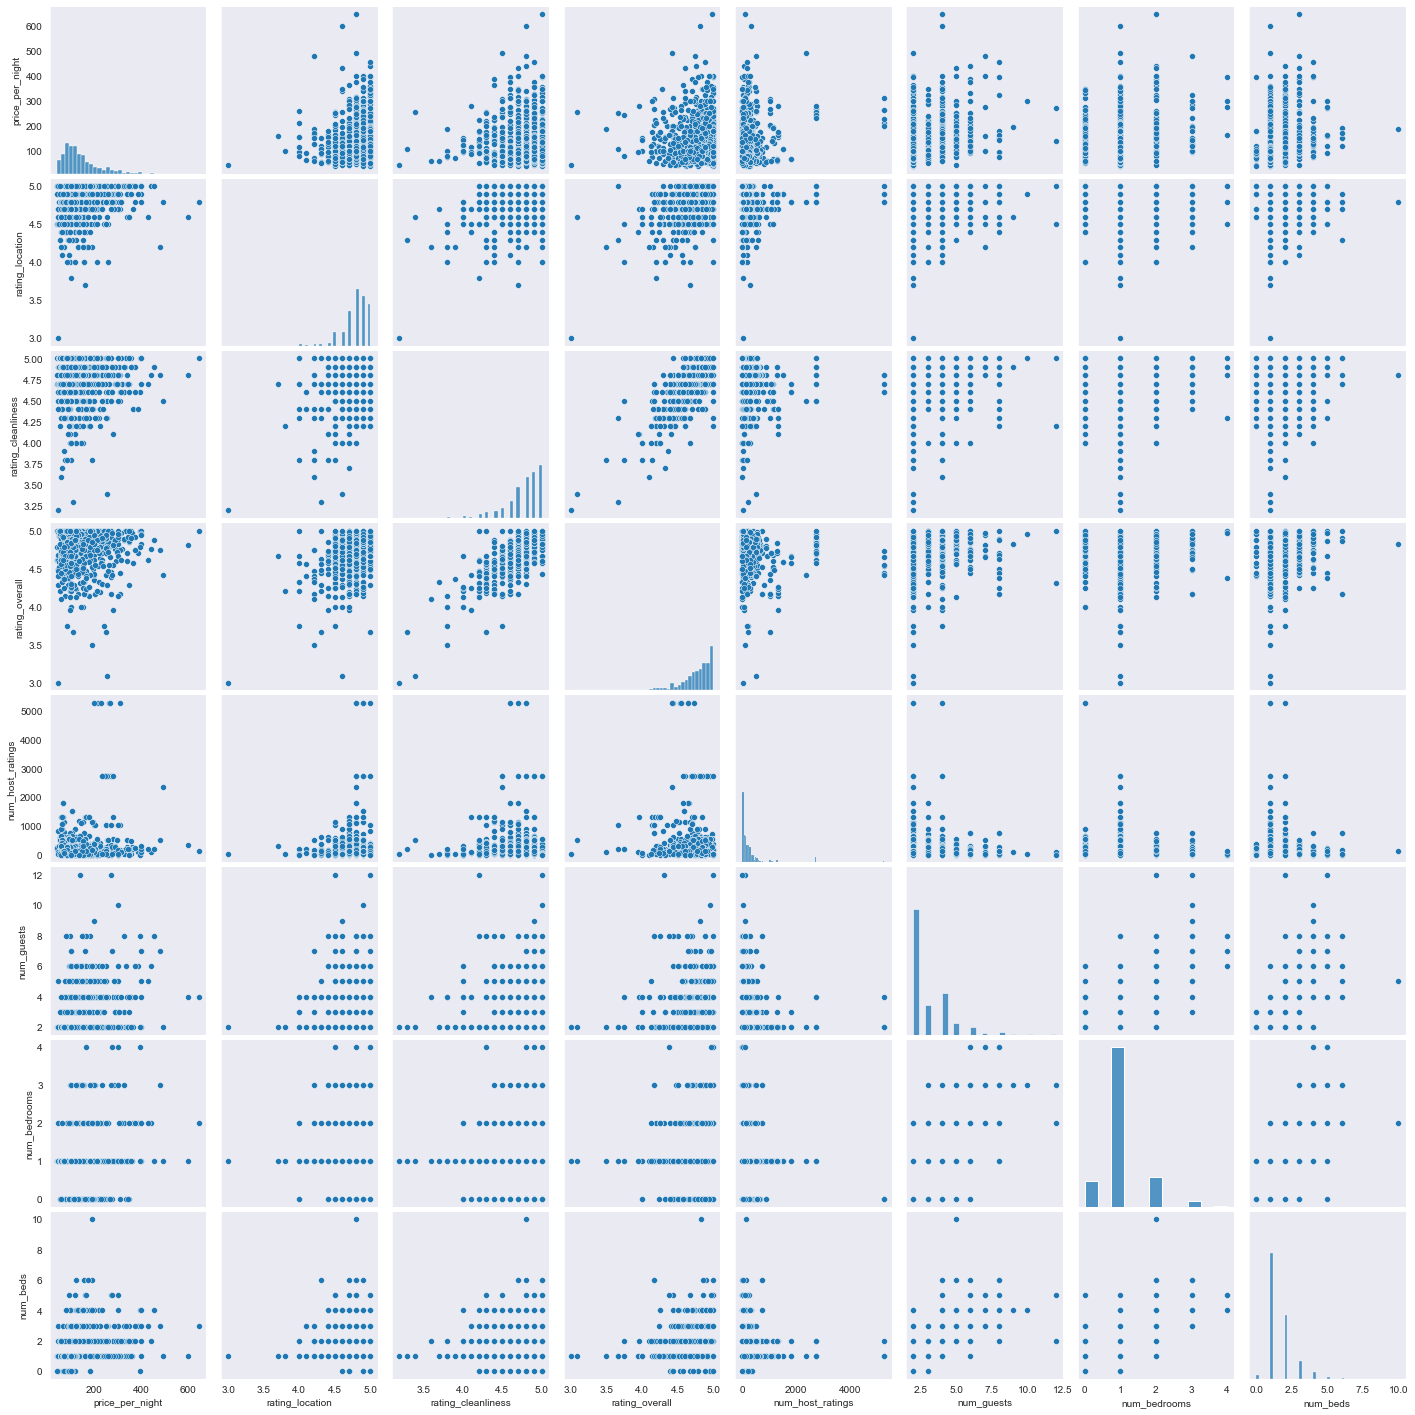

In [230]:
sns.pairplot(sub_df)

### Number of guests (highest correlation of 0.29)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '12')])

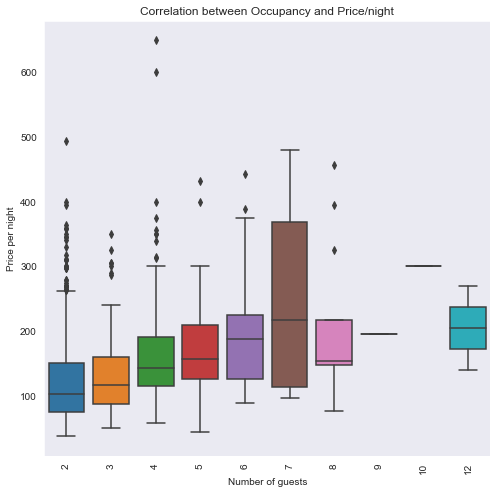

In [197]:
plt.figure(figsize=(8,8))
sns.boxplot(x='num_guests',y='price_per_night', data=sub_df)
plt.title('Correlation between Occupancy and Price/night')
plt.xlabel('Number of guests')
plt.ylabel('Price per night')
plt.xticks(rotation=90)

In [47]:
sub_df.num_guests.value_counts()

2     538
4     177
3     128
5      50
6      33
8      12
7       6
12      2
9       1
10      1
Name: num_guests, dtype: int64

Text(0, 0.5, 'Price')

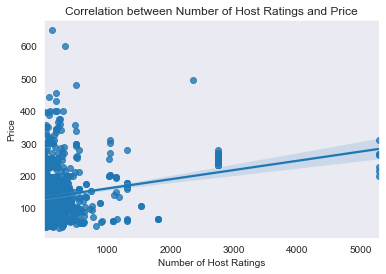

In [54]:
fig = sns.regplot(x='num_host_ratings',y='price_per_night',data=sub_df)
fig.set_title('Correlation between Number of Host Ratings and Price')
fig.set_xlabel('Number of Host Ratings')
fig.set_ylabel('Price')

- Number of host ratings may not be that great of a predictor since a lot of listings on the far left have high prices.
- Maybe hosts with 3000 and 5000 ratings are outliers.

### Number of bedrooms (third highest correlation of 0.2)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

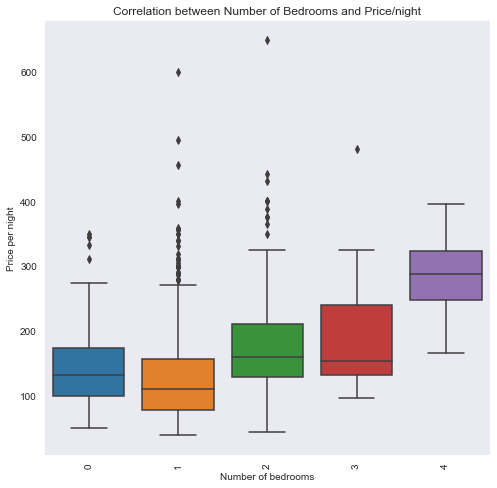

In [201]:
plt.figure(figsize=(8,8))
sns.boxplot(x='num_bedrooms',y='price_per_night', data=sub_df)
plt.title('Correlation between Number of Bedrooms and Price/night')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price per night')
plt.xticks(rotation=90)

## Categorical Features

In [55]:
df.columns

Index(['name', 'price_per_night', 'rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths', 'superhost',
       'borough', 'property_type', 'wifi', 'air_conditioning', 'heating',
       'kitchen'],
      dtype='object')

In [56]:
categorical_features = ['superhost','borough','property_type','wifi', 'air_conditioning', 'heating','kitchen']

### Superhost

In [57]:
df.groupby(['superhost']).price_per_night.describe()

,count,mean,std,min,25%,50%,75%,max
superhost,,,,,,,,
0,505.0,137.378218,78.490328,38.0,80.0,119.0,170.0,494.0
1,443.0,143.325056,78.578623,46.0,90.0,121.0,175.0,649.0


- Superhost listings are on average $6 more expensive. Not that substantial.

### Borough

In [58]:
df.groupby(['borough']).price_per_night.describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
bronx,187.0,121.925134,62.855824,40.0,77.50,106.0,148.5,395.0
brooklyn,300.0,135.110000,77.473512,43.0,82.75,120.5,165.0,649.0
manhattan,211.0,197.317536,86.325511,54.0,126.00,184.0,254.0,494.0
queens,189.0,111.703704,58.437428,38.0,72.00,99.0,135.0,400.0
staten island,61.0,111.311475,48.837329,55.0,80.00,97.0,128.0,300.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'staten island'),
  Text(1, 0, 'queens'),
  Text(2, 0, 'bronx'),
  Text(3, 0, 'brooklyn'),
  Text(4, 0, 'manhattan')])

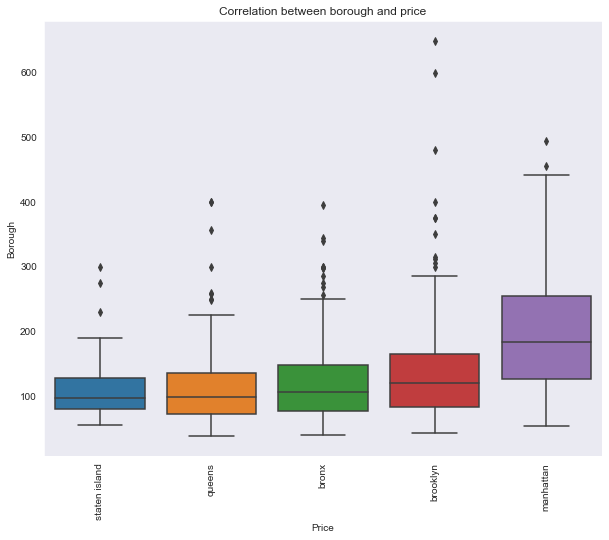

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(x='borough',y='price_per_night', data=df, order=['staten island','queens','bronx','brooklyn','manhattan'])
plt.title('Correlation between borough and price')
plt.ylabel('Borough')
plt.xlabel('Price')
plt.xticks(rotation=90)

### Property type

In [60]:
df.groupby(['property_type']).price_per_night.describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
apartment,352.0,162.843750,74.625874,55.0,112.75,145.0,189.00,456.0
condo,18.0,180.611111,91.497437,104.0,131.25,147.0,190.50,480.0
hotel,74.0,244.662162,60.550732,102.0,214.75,246.5,269.00,494.0
house,76.0,136.092105,52.789690,44.0,96.75,126.5,163.25,300.0
loft,11.0,254.545455,147.579378,99.0,159.00,215.0,297.00,600.0
private room,398.0,95.703518,49.554972,38.0,65.00,86.5,115.00,649.0
shared room,1.0,75.000000,NaN,75.0,75.00,75.0,75.00,75.0
townhouse,18.0,160.222222,81.940118,76.0,100.25,153.0,166.50,400.0


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'shared room'),
  Text(1, 0, 'private room'),
  Text(2, 0, 'house'),
  Text(3, 0, 'townhouse'),
  Text(4, 0, 'apartment'),
  Text(5, 0, 'condo'),
  Text(6, 0, 'hotel'),
  Text(7, 0, 'loft')])

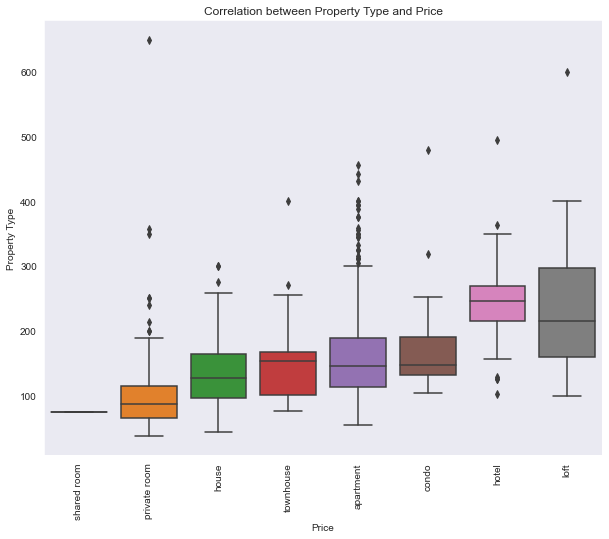

In [62]:
plt.figure(figsize=(10,8))
sns.boxplot(x='property_type',y='price_per_night', data=df, order=['shared room','private room','house','townhouse','apartment','condo','hotel','loft'])
plt.title('Correlation between Property Type and Price')
plt.ylabel('Property Type')
plt.xlabel('Price')
plt.xticks(rotation=90)

### Wifi

In [64]:
df.groupby(['wifi']).price_per_night.describe()

,count,mean,std,min,25%,50%,75%,max
wifi,,,,,,,,
0,5.0,90.200000,24.863628,50.0,86.0,99.0,100.0,116.0
1,943.0,140.422057,78.653140,38.0,85.0,120.0,172.5,649.0


In [66]:
df.wifi.value_counts()

1    943
0      5
Name: wifi, dtype: int64

- 99% listings have wifi, not useful

### Air conditioning

In [69]:
df.air_conditioning.value_counts()

1    908
0     40
Name: air_conditioning, dtype: int64

- 96% listings have AC, not useful

### Heating

In [70]:
df.heating.value_counts()

1    930
0     18
Name: heating, dtype: int64

- 98% listings have heating, not useful

### Kitchen

In [71]:
df.kitchen.value_counts()

1    745
0    203
Name: kitchen, dtype: int64

In [72]:
df.groupby(['kitchen']).price_per_night.describe()

,count,mean,std,min,25%,50%,75%,max
kitchen,,,,,,,,
0,203.0,152.522167,85.753926,44.0,81.5,125.0,230.0,494.0
1,745.0,136.787919,76.178717,38.0,88.0,120.0,164.0,649.0


- would expect that properties with kitchen are priced higher on average
- considering NYC, kitchen may not be as important

In [73]:
df.groupby(['borough']).kitchen.value_counts()

borough        kitchen
bronx          1          155
               0           32
brooklyn       1          256
               0           44
manhattan      1          137
               0           74
queens         1          142
               0           47
staten island  1           55
               0            6
Name: kitchen, dtype: int64

In [74]:
df.groupby('property_type').kitchen.value_counts()

property_type  kitchen
apartment      1          329
               0           23
condo          1           16
               0            2
hotel          0           72
               1            2
house          1           68
               0            8
loft           1            9
               0            2
private room   1          305
               0           93
shared room    1            1
townhouse      1           15
               0            3
Name: kitchen, dtype: int64

## Target Distribution

Text(0.5, 0, 'Price per Night')

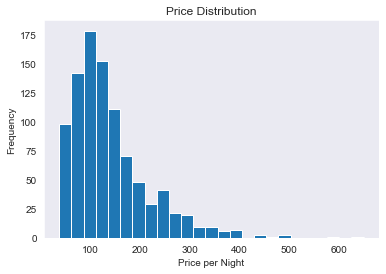

In [82]:
plt.hist(x=df['price_per_night'], bins=25)
plt.title('Price Distribution')
plt.ylabel('Frequency')
plt.xlabel('Price per Night')

- may consider log transformation for price for more normal distribution

## Summary

In [ ]:
# Choose small handful of features for baselining, that are most likely to be predictive based on intuition and EDA

**Promising Numeric Features:**
- num_guests
- num_host_ratings
- num_bedrooms
- rating_location

**Promising Categorical Features:**
- borough
- property type


# Baselining

In [91]:
# Start with num_bedrooms, rating_location, borough

In [93]:
# Dummify borough

boroughs_df = pd.get_dummies(df['borough'], drop_first=True)
boroughs_df.head()

,brooklyn,manhattan,queens,staten island
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [107]:
base_features = ['price_per_night', 'num_bedrooms', 'rating_location']
base_df = df.loc[:,base_features]

base_df = pd.concat([base_df, boroughs_df], axis=1)
base_df.reset_index(drop=True,inplace=True)

In [108]:
base_df.head()

,price_per_night,num_bedrooms,rating_location,brooklyn,manhattan,queens,staten island
0,107,0,5.0,0,1,0,0
1,305,1,4.9,0,1,0,0
2,159,1,3.7,0,1,0,0
3,179,1,4.9,0,1,0,0
4,130,1,5.0,0,1,0,0


In [109]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_per_night  948 non-null    int64  
 1   num_bedrooms     948 non-null    int64  
 2   rating_location  948 non-null    float64
 3   brooklyn         948 non-null    uint8  
 4   manhattan        948 non-null    uint8  
 5   queens           948 non-null    uint8  
 6   staten island    948 non-null    uint8  
dtypes: float64(1), int64(2), uint8(4)
memory usage: 26.0 KB


In [110]:
base_df.shape

(948, 7)

## Insert Log Transformation of Price into original dataframe

In [130]:
df['log_price'] = np.log(df['price_per_night'])

### Simple Linear Regression

Set initial x/y and split, one set for training/val and the other for testing (80:20 split):

In [127]:
#TRAIN_TEST_SPLIT (80/20)

#CREATE TRAIN/TEST/VALIDATION SETS
#set X and y as datasets
X = base_df[['num_bedrooms', 'rating_location','brooklyn', 'manhattan', 'queens', 'staten island']]
y = base_df['price_per_night']

#Split data into two sections: Train+Val, Testing 
#results in 20 test, 80 training
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=20)

In [128]:
#CROSS VALIDATION LINEAR REGRESSION ON TRAINING DATA
#don't need standard scaler here bc regular linear regression

kf = KFold(n_splits=5, shuffle=True, random_state = 71)

#Create an empty model
#regular cross validation 
lm_cv = LinearRegression()

#fit model
lm_cv.fit(X_train_val, y_train_val)

#all five values
print(cross_val_score(lm_cv, X_train_val, y_train_val, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(lm_cv, X_train_val, y_train_val, cv=kf, scoring='r2')))

[0.21207282 0.24898992 0.16752472 0.18223816 0.20783518]
0.20373215745424536


That is not very good. See if log transforming price helps.

### With log transformation of price

In [131]:
#TRAIN_TEST_SPLIT (80/20)

#CREATE TRAIN/TEST/VALIDATION SETS
#set X and y as datasets
X = base_df[['num_bedrooms', 'rating_location','brooklyn', 'manhattan', 'queens', 'staten island']]
y_log = df['log_price']

#Split data into two sections: Train+Val, Testing 
#results in 20 test, 80 training
X_train_val, X_test, y_log_train_val, y_log_test = train_test_split(X, y_log, test_size=.2, random_state=20)

In [248]:
#CROSS VALIDATION LINEAR REGRESSION ON TRAINING DATA WITH LOG PRICE
#don't need standard scaler here bc regular linear regression

kf = KFold(n_splits=5, shuffle=True, random_state = 71)

#Create an empty model
#regular cross validation 
lm_cv = LinearRegression()

#fit model
lm_cv.fit(X_train_val, y_log_train_val)

#all five values
print(cross_val_score(lm_cv, X_train_val, y_log_train_val, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(lm_cv, X_train_val, y_log_train_val, cv=kf, scoring='r2')))

lm_cv.score(X_test, y_test)

[0.22000431 0.25710212 0.15681811 0.24227845 0.19064921]
0.2133704412165968


-3.1608431856189947

- 0.01% better

In [251]:
def split_and_cross_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    # perform train/val split
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=20)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)

    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train_val, y_train_val)
    
    # score fit model on validation data & report results
    print('\nCross Validation Scores:', cross_val_score(lr_model, X_train_val, y_train_val, cv=kf, scoring='r2'))
    print('\nMean Score:',np.mean(cross_val_score(lr_model, X_train_val, y_train_val, cv=kf, scoring='r2')))
    print(lr_model.score(X_test, y_test))

In [252]:
split_and_cross_validate(X, y_log)


Cross Validation Scores: [0.22000431 0.25710212 0.15681811 0.24227845 0.19064921]

Mean Score: 0.2133704412165968
0.33591861219712105


### Add property type dummy variables

In [152]:
base_df.columns

Index(['price_per_night', 'num_bedrooms', 'rating_location', 'brooklyn',
       'manhattan', 'queens', 'staten island', 'condo', 'hotel', 'house',
       'loft', 'private room', 'shared room', 'townhouse', 'condo', 'hotel',
       'house', 'loft', 'private room', 'shared room', 'townhouse'],
      dtype='object')

In [153]:
# Dummify property type

property_df = pd.get_dummies(df['property_type'], drop_first=True)
property_df.head()

,condo,hotel,house,loft,private room,shared room,townhouse
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0


In [154]:
base_df = pd.concat([base_df, property_df], axis=1)
base_df.reset_index(drop=True,inplace=True)

In [155]:
base_df.columns

Index(['price_per_night', 'num_bedrooms', 'rating_location', 'brooklyn',
       'manhattan', 'queens', 'staten island', 'condo', 'hotel', 'house',
       'loft', 'private room', 'shared room', 'townhouse', 'condo', 'hotel',
       'house', 'loft', 'private room', 'shared room', 'townhouse', 'condo',
       'hotel', 'house', 'loft', 'private room', 'shared room', 'townhouse'],
      dtype='object')

In [156]:
X2 = base_df[['num_bedrooms', 'rating_location', 'brooklyn',
       'manhattan', 'queens', 'staten island', 'condo', 'hotel', 'house',
       'loft', 'private room', 'shared room', 'townhouse']]

y = base_df['price_per_night']

In [157]:
split_and_cross_validate(X2, y)


Cross Validation Scores: [0.48599947 0.42975081 0.32116014 0.33848691 0.48008731]

Mean Score: 0.41109692685433386


- up 20% from before without property types

### With property type dummy variable and log price

In [159]:
split_and_cross_validate(X2, y_log)


Cross Validation Scores: [0.57311532 0.51712596 0.38668384 0.48395458 0.54208948]

Mean Score: 0.5005938332564966


In [160]:
df.columns

Index(['name', 'price_per_night', 'rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths', 'superhost',
       'borough', 'property_type', 'wifi', 'air_conditioning', 'heating',
       'kitchen', 'log_price'],
      dtype='object')

### All numeric features and price

In [163]:
all_numeric_features = ['rating_overall', 'rating_cleanliness',
       'rating_accuracy', 'rating_communication', 'rating_location',
       'rating_check_in', 'rating_value', 'num_listing_reviews',
       'num_host_ratings', 'host_response_rate', 'host_joined_months_ago',
       'num_guests', 'num_bedrooms', 'num_beds', 'num_baths']

df_all_numeric = df.loc[:,all_numeric_features]

X3 = df_all_numeric

In [164]:
split_and_cross_validate(X3, y)


Cross Validation Scores: [0.23458431 0.16341436 0.21639184 0.24637874 0.25114472]

Mean Score: 0.22238279436428615


In [246]:
split_and_cross_validate(X3, y_log)


Cross Validation Scores: [0.28417547 0.19190423 0.23185204 0.35799729 0.26329989]

Mean Score: 0.26584578405090764


### Baseline all features: All numeric features, property dummies, borough dummies --> price

In [193]:
df_all_dummies = df.drop(['name'], axis=1)
df_all_dummies = df_all_dummies.drop(['price_per_night'], axis=1)
df_all_dummies = df_all_dummies.drop(['log_price'], axis=1)
df_all_dummies.head()

df_all_dummies = pd.get_dummies(df_all_dummies, drop_first=True)
df_all_dummies.head()

list(df_all_dummies.columns)

X4 = df_all_dummies

In [194]:
split_and_cross_validate(X4, y)


Cross Validation Scores: [0.50242882 0.44067501 0.33039418 0.38801533 0.5186481 ]

Mean Score: 0.4360322860128326


In [247]:
split_and_cross_validate(X4, y_log)


Cross Validation Scores: [0.60516252 0.55420676 0.401836   0.53911219 0.57980869]

Mean Score: 0.5360252333518953


### Try more numeric features with property type, boroughs, superhost

In [202]:
# numeric: rating overall, rating cleanliness, rating location, num bedrooms, num guests, num host ratings
# categorical: superhost, borough, property type

In [232]:
df_5 = df.loc[:,['rating_overall','rating_cleanliness','rating_location','num_bedrooms','num_guests','num_host_ratings','superhost','borough','property_type']]
df_5 = pd.get_dummies(df_5,drop_first=True)
X5 = df_5

In [233]:
split_and_cross_validate(X5, y)


Cross Validation Scores: [0.4680705  0.42435671 0.34561028 0.37270621 0.52259709]

Mean Score: 0.4266681592216431


In [234]:
split_and_cross_validate(X5, y_log)


Cross Validation Scores: [0.56387101 0.5087182  0.40411969 0.51994798 0.58166273]

Mean Score: 0.5156639203484623


- 9% better

In [235]:
# do log transformations of ratings
df['log_rating_overall'] = np.log(df['rating_overall'])
df['log_rating_cleanliness'] = np.log(df['rating_cleanliness'])
df['log_rating_location'] = np.log(df['rating_location'])


In [236]:
df_6 = df.loc[:,['log_rating_overall','log_rating_cleanliness','log_rating_location','num_bedrooms','num_guests','num_host_ratings','superhost','borough','property_type']]
df_6 = pd.get_dummies(df_6,drop_first=True)
X6 = df_6

In [237]:
split_and_cross_validate(X6, y)


Cross Validation Scores: [0.46457139 0.42592659 0.34203548 0.36879382 0.52358091]

Mean Score: 0.4249816366965602


In [238]:
split_and_cross_validate(X6, y_log)


Cross Validation Scores: [0.56106419 0.50924887 0.39974595 0.51610649 0.57996121]

Mean Score: 0.5132253403210929


### Without rating overall and rating cleanliness

In [239]:
df_7 = df.loc[:,['rating_location','num_bedrooms','num_guests','num_host_ratings','superhost','borough','property_type']]
df_7 = pd.get_dummies(df_7,drop_first=True)
X7 = df_7

In [241]:
split_and_cross_validate(X7, y)


Cross Validation Scores: [0.48291648 0.4116683  0.32058188 0.36113449 0.51850193]

Mean Score: 0.41896061580177396


In [242]:
split_and_cross_validate(X7, y_log)


Cross Validation Scores: [0.5791171  0.49796947 0.38169521 0.50932825 0.57616737]

Mean Score: 0.5088554805393273


### Add squared term for location rating

In [243]:
X8 = X7.copy()
X8['rating_location_2'] = X8['rating_location'] ** 2

In [244]:
split_and_cross_validate(X8, y)


Cross Validation Scores: [0.50462938 0.40304549 0.35658453 0.27654701 0.52600823]

Mean Score: 0.41336292903524025


In [245]:
split_and_cross_validate(X8, y_log)


Cross Validation Scores: [0.59444402 0.49126384 0.4131563  0.36034855 0.58557245]

Mean Score: 0.4889570304892583
